## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

import statsmodels.api as sm
import statsmodels.formula.api as smf
#import additional libraries here if you need them
import seaborn as sns
from seaborn import plt
from patsy import dmatrices

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import scale

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [64]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
df_spam = pd.read_csv("spambase.csv")

# spam_data.describe()
#spam_data.info()

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [65]:
df_spam.shape

(4601, 58)

In [66]:
df_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [67]:
#sns.pairplot(df_spam)

In [68]:
#We want to drop the NA values
df_spam = df_spam.dropna()

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

Model = No Good with single feature

In [69]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
#formula = 'survived ~ C(pclass) + C(sex) + age + sibsp  + C(embarked)' 
formula = "is_spam ~ capital_run_length_longest"
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [70]:

# instantiate our model
model = smf.logit(formula, df_spam)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()


Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4599
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                  0.1604
Time:                        00:04:28   Log-Likelihood:                -2590.2
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                3.003e-217
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.2531      0.046    -27.416      0.000        -1.343    -1.163
capital_run_length_longest     0.0252      0.001     21.189      0.000         0.023     0.028
==============================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8


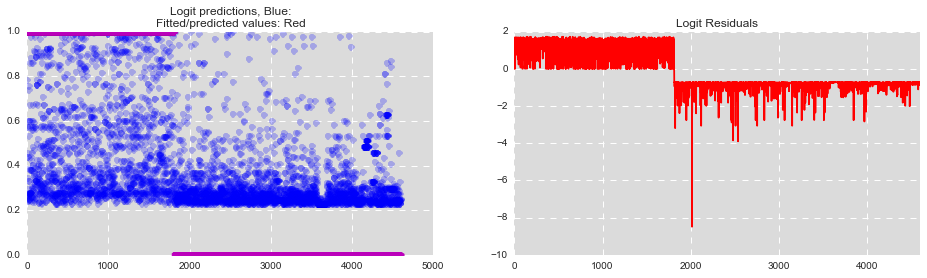

In [71]:
# create a regression freindly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df_spam, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# Plot Predictions Vs Actual
plt.figure(figsize=(16,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
xindex = range(0, len(df_spam))
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [72]:
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


statsmodel and patsy did not like the column names like : char_freq_# so renamed them to get all X's

In [73]:
df_spam.columns.values

array(['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq

In [74]:
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_semi', 'char_freq_lperen', 'char_freq_lbrac', 'char_freq_exclaim',
       'char_freq_dol', 'char_freq_hash', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'is_spam']

In [75]:
df_spam.columns = cols

In [76]:
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_semi,char_freq_lperen,char_freq_lbrac,char_freq_exclaim,char_freq_dol,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [77]:
# insert code to change regx column names in df_spam
# this did not work - review later
#df_spam2 = df_spam.rename(columns={'char_freq_;': 'char_freq_semi', 'char_freq_(': 'char_freq_lparen', 'char_freq_[': 'char_freq_lbrac', 'char_freq_!'; 'char_freq_exclaim', 'char_freq_$': 'char_freq_dol', 'char_freq_#': 'char_freq_pound'}, inplace=True)

In [78]:
# get the Y as "is_spam"

df_spam_Y = df_spam.ix[:,57:]
#df_spam_Y = df_spam['is_spam']

#We want to drop the NA values
df_spam_Y = df_spam_Y.dropna()
df_spam_Y.head(2)

,is_spam
0,1
1,1


In [79]:
# Split the data into X's and drop "is_spam" the Y

df_spam_X = df_spam.drop(['is_spam'], axis=1)
#We want to drop the NA values
df_spam_X = df_spam_X.dropna()
df_spam_X.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_semi,char_freq_lperen,char_freq_lbrac,char_freq_exclaim,char_freq_dol,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191


In [80]:
# check that we should have 57 columns in X now
len(df_spam_X.columns)

57

In [81]:
# add the constant to seed the model
#df_spam_X = sm.tools.add_constant(df_spam_X)
#df_spam_X.head(1)

In [82]:
df_spam_Y.values

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [0],
       [0]])

In [84]:

# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(df_spam_X, df_spam_Y['is_spam'], test_size=0.3, random_state=12)


In [85]:

#np.log(char_freq_semi) + np.log(char_freq_lperen) +  np.log(char_freq_lbrac) +  np.log(char_freq_exclaim) + np.log(char_freq_dol) + np.log(char_freq_hash)np.log(char_freq_semi) + np.log(char_freq_lperen) +  np.log(char_freq_lbrac) +  np.log(char_freq_exclaim) + np.log(char_freq_dol) + np.log(char_freq_hash)

In [86]:
# model formual with all variables

forumla = 'is_spam ~ np.log(word_freq_make) + np.log(word_freq_address) + np.log(word_freq_all) + np.log(word_freq_3d) + np.log(word_freq_our) + np.log(word_freq_over) + np.log(word_freq_remove) + np.log(word_freq_internet) + np.log(word_freq_order) + np.log(word_freq_mail) + np.log(word_freq_receive) + np.log(word_freq_will) + np.log(word_freq_peoplei) + np.log(word_freq_report) + np.log(word_freq_addresses) + np.log(word_freq_free) + np.log(word_freq_business) + np.log(word_freq_email) + np.log(word_freq_you) + np.log(word_freq_credit) + np.log(word_freq_your) + np.log(word_freq_font) + np.log(word_freq_000) + np.log(word_freq_money) + np.log(word_freq_hp) + np.log(word_freq_hpl) + np.log(word_freq_george) + np.log(word_freq_650) + np.log(word_freq_lab) + np.log(word_freq_labs) + np.log(word_freq_telnet) + np.log(word_freq_857) + np.log(word_freq_data) + np.log(word_freq_415) + np.log(word_freq_85) + np.log(word_freq_technology) + np.log(word_freq_1999) + np.log(word_freq_parts) + np.log(word_freq_pm) + np.log(word_freq_direct) + np.log(word_freq_cs) + np.log(word_freq_meeting) + np.log(word_freq_original) + np.log(word_freq_project) + np.log(word_freq_re) + np.log(word_freq_edu) + np.log(word_freq_table) + np.log(word_freq_conference) + np.log(char_freq_semi) + np.log(char_freq_lperen) +  np.log(char_freq_lbrac) +  np.log(char_freq_exclaim) + np.log(char_freq_dol) + np.log(char_freq_hash)np.log(char_freq_semi) + np.log(char_freq_lperen) +  np.log(char_freq_lbrac) +  np.log(char_freq_exclaim) + np.log(char_freq_dol) + np.log(char_freq_hash) + np.log(capital_run_length_average) + np.log(capital_run_length_longest) + np.log(capital_run_length_total)'

#formual = 'is_spam ~ (word_freq_make) +  (word_freq_address) + (word_freq_all) + (word_freq_3d) + (word_freq_our) + (word_freq_over) + (word_freq_remove) + (word_freq_internet) + (word_freq_order) + (word_freq_mail) + (word_freq_receive) + (word_freq_will) + (word_freq_peoplei) + (word_freq_report) + (word_freq_addresses) + (word_freq_free) + (word_freq_business) + (word_freq_email) + (word_freq_you) + (word_freq_credit) + (word_freq_your) + (word_freq_font) + (word_freq_000) + (word_freq_money) + (word_freq_hp) + (word_freq_hpl) + (word_freq_george) + (word_freq_650) + (word_freq_lab) + (word_freq_labs) + (word_freq_telnet) + (word_freq_857) + (word_freq_data) + (word_freq_415) + (word_freq_85) + (word_freq_technology) + (word_freq_1999) + (word_freq_parts) + (word_freq_pm) + (word_freq_direct) + (word_freq_cs) + (word_freq_meeting) + (word_freq_original) + (word_freq_project) + (word_freq_re) + (word_freq_edu) + (word_freq_table) + (word_freq_conference) + (capital_run_length_average) + (capital_run_length_longest) + (capital_run_length_total)'

#create a results dictionary to hold our regression results for easy analysis later        
results = {}


In [87]:
# create a regression freindly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df_spam, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()


Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4599
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                  0.1604
Time:                        00:04:42   Log-Likelihood:                -2590.2
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                3.003e-217
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.2531      0.046    -27.416      0.000        -1.343    -1.163
capital_run_length_longest     0.0252      0.001     21.189      0.000         0.023     0.028
==============================================================================================
"""

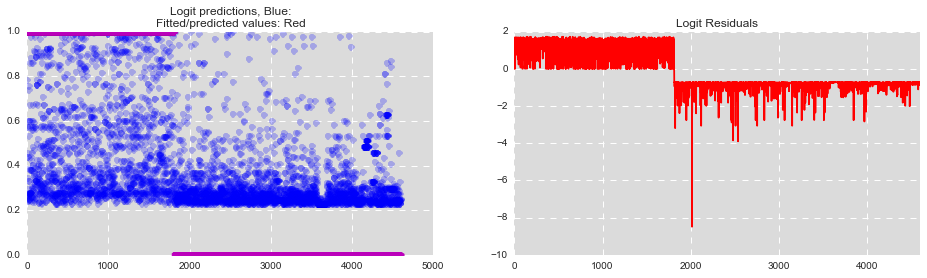

In [88]:
# Plot Predictions Vs Actual
plt.figure(figsize=(16,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
xindex = range(0, len(df_spam))
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

In [89]:
res.conf_int()


,0,1
Intercept,-1.342635,-1.163475
capital_run_length_longest,0.022890,0.027557


In [90]:
#Odd Ratio: Take the exponential of each of the coefficients to generate the odds ratios.
#This tells you how a 1 unit increase or decrease in a variable affects the odds of surviving
print np.exp(res.params)

Intercept                     0.285631
capital_run_length_longest    1.025544
dtype: float64


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [91]:
X_train.shape[0] == y_train.shape[0]

True

In [92]:
X_test.shape[0] == y_test.shape[0]

True

In [93]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.1)
clf

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [94]:
X_train

array([[  1.00000000e-01,   1.00000000e-01,   1.00000000e-01, ...,
          1.74400000e+00,   2.90000000e+01,   4.17000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.71400000e+00,   4.00000000e+00,   1.20000000e+01],
       [  3.30000000e-01,   0.00000000e+00,   0.00000000e+00, ...,
          1.27100000e+00,   5.00000000e+00,   7.50000000e+01],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   3.80000000e-01, ...,
          2.95300000e+00,   3.40000000e+01,   1.27000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   2.60000000e-01, ...,
          1.63500000e+00,   6.00000000e+00,   1.39000000e+02],
       [  0.00000000e+00,   1.90000000e-01,   3.90000000e-01, ...,
          1.35700000e+00,   1.90000000e+01,   1.48000000e+02]])

In [95]:
X_train.shape

(3220, 57)

In [96]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [97]:
y_train.shape

(3220,)

In [98]:
clf.fit(X_train, y_train)


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [99]:
clf.score(X_test, y_test)

0.78638667632150616

In [100]:
clf.score(X_train, y_train)

0.79316770186335406

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [101]:
# Start testing prediction with cross-val
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)
#scores = cross_val_score(clf, X_train, y_train, cv=5)
#print scores

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

KNN unscaled very similar to logistic regression. Now lets try to beat Logisitic regression by scaling KNN.

In [102]:
clf.score(X_test, y_test)

0.78276611151339603

In [103]:
# DO KNN after we scale the values
from sklearn.preprocessing import StandardScaler

features_scalar = StandardScaler()

In [104]:
X_train_scaled = features_scalar.fit_transform(X_train)

In [105]:
# Do a KNN with Three Class levels
from sklearn import neighbors

clf_scaled = neighbors.KNeighborsClassifier(3, weights='uniform')
clf_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

Nice improvement from scaling!!

In [106]:

X_test_scaled = features_scalar.transform(X_test)

clf_scaled.score(X_test_scaled, y_test)

0.89790007241129621

Now lets try to how KNN varies with N. Looks like drops off sharply after n=5!

In [107]:
# Various variables we'll need to set intially.
n_neighbors = range(1, 51, 2)

scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

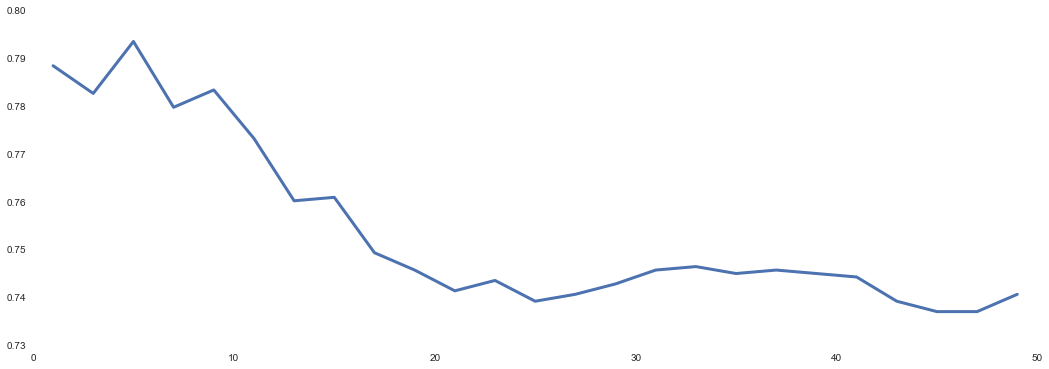

In [108]:
plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)

In [109]:

np.mean(scores)

0.75414916727009418

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

###Using Gausian NB - note, alpha is not a parameter with Gaussian
in fact there are no parameters to optimize with GuassianNB... so really no need to do a grid search... could just do Crossvalidation score

In [110]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline

clf = GaussianNB()

np.mean(cross_val_score(clf, X_train, y_train, cv=5))

0.81304070540591389

####to see that results are similar, use the grid search...

In [111]:
pipeline = Pipeline((
    ('clf', GaussianNB()),
))


In [112]:
parameters = {}

gs = GridSearchCV(pipeline, parameters, verbose=2, refit=False, n_jobs=1)

In [113]:
_ = gs.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................
[CV] .......................................................  -   0.0s
[CV]  ................................................................
[CV] .......................................................  -   0.0s
[CV]  ................................................................
[CV] .......................................................  -   0.0s


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [114]:
gs.best_score_

0.81490683229813665

In [115]:
gs.best_params_

{}

###Using BernoulliNB - this one does have a few parameters to optimize

parameters live here: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [116]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline((
    ('clf', BernoulliNB()),
))


In [117]:
#your code here
from sklearn.grid_search import GridSearchCV

parameters = {
    'clf__alpha': np.logspace(-5, 0, 3),
    'clf__binarize': [0.01,.1,.2,.3,.5,.7],
    'clf__fit_prior': [True, False]
}

gs = GridSearchCV(pipeline, parameters, verbose=2, refit=False, n_jobs=1)

In [118]:
_ = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] clf__fit_prior=True, clf__binarize=0.01, clf__alpha=1e-05 .......
[CV]  clf__fit_prior=True, clf__binarize=0.01, clf__alpha=1e-05 -   0.0s
[CV] clf__fit_prior=True, clf__binarize=0.01, clf__alpha=1e-05 .......
[CV]  clf__fit_prior=True, clf__binarize=0.01, clf__alpha=1e-05 -   0.0s
[CV] clf__fit_prior=True, clf__binarize=0.01, clf__alpha=1e-05 .......
[CV]  clf__fit_prior=True, clf__binarize=0.01, clf__alpha=1e-05 -   0.0s
[CV] clf__fit_prior=False, clf__binarize=0.01, clf__alpha=1e-05 ......
[CV]  clf__fit_prior=False, clf__binarize=0.01, clf__alpha=1e-05 -   0.0s
[CV] clf__fit_prior=False, clf__binarize=0.01, clf__alpha=1e-05 ......
[CV]  clf__fit_prior=False, clf__binarize=0.01, clf__alpha=1e-05 -   0.0s
[CV] clf__fit_prior=False, clf__binarize=0.01, clf__alpha=1e-05 ......
[CV]  clf__fit_prior=False, clf__binarize=0.01, clf__alpha=1e-05 -   0.0s
[CV] clf__fit_prior=True, clf__binarize=0.1, clf__alpha=1e-05 ........


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed:    0.2s



[CV] clf__fit_prior=False, clf__binarize=0.01, clf__alpha=0.00316227766017 
[CV]  clf__fit_prior=False, clf__binarize=0.01, clf__alpha=0.00316227766017 -   0.0s
[CV] clf__fit_prior=True, clf__binarize=0.1, clf__alpha=0.00316227766017 
[CV]  clf__fit_prior=True, clf__binarize=0.1, clf__alpha=0.00316227766017 -   0.0s
[CV] clf__fit_prior=True, clf__binarize=0.1, clf__alpha=0.00316227766017 
[CV]  clf__fit_prior=True, clf__binarize=0.1, clf__alpha=0.00316227766017 -   0.0s
[CV] clf__fit_prior=True, clf__binarize=0.1, clf__alpha=0.00316227766017 
[CV]  clf__fit_prior=True, clf__binarize=0.1, clf__alpha=0.00316227766017 -   0.0s
[CV] clf__fit_prior=False, clf__binarize=0.1, clf__alpha=0.00316227766017 
[CV]  clf__fit_prior=False, clf__binarize=0.1, clf__alpha=0.00316227766017 -   0.0s
[CV] clf__fit_prior=False, clf__binarize=0.1, clf__alpha=0.00316227766017 
[CV]  clf__fit_prior=False, clf__binarize=0.1, clf__alpha=0.00316227766017 -   0.0s
[CV] clf__fit_prior=False, clf__binarize=0.1, clf

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.4s finished


The BernoulliNB with good params outperforms GaussianNB by 10% which is nice. Get us to 90%

In [119]:
gs.best_score_

0.90341614906832302

In [120]:
gs.best_params_

{'clf__alpha': 1.0000000000000001e-05,
 'clf__binarize': 0.1,
 'clf__fit_prior': False}

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [140]:
#remember that grid search doesn't give you a fitted model. It just tells you the best parameters, so you still need
# to rebuild the model
#for example, lets use the Bernoulli NB 

modelNB = BernoulliNB(alpha = .00005, binarize = 0.1, fit_prior = False)
modelNB.fit(X_train, y_train)

BernoulliNB(alpha=5e-05, binarize=0.1, class_prior=None, fit_prior=False)

In [141]:
#now that we have a fitted model we can use predict and predict_proba
y_predicted = modelNB.predict(X_test)
y_proba = modelNB.predict_proba(X_test)

In [142]:
#to get to categories, we want to feed in a list of either spam or not-spam
categories = np.unique(df_spam['is_spam'])



In [124]:
#your code here
def plot_roc_curve(target_test, target_predicted_proba, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

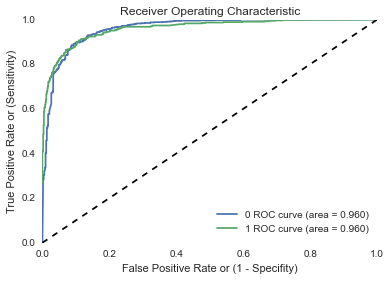

In [125]:
#now we can use this function:
plot_roc_curve(y_test, y_proba, categories)

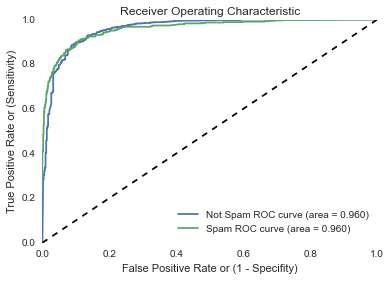

In [126]:
#or since the 0 / 1 labels don't make much sense, you could just feed the function a list of category names...
categories2 = ['Not Spam', 'Spam']
plot_roc_curve(y_test, y_proba, categories2)

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [136]:
df_thresh = pd.DataFrame(y_proba,columns=['A','B'])
df_thresh.head(2)

,A,B
0,6.406493e-14,1.000000
1,9.969067e-01,0.003093


In [138]:
#Your code he
df_thresh['pred_class_thresh_08']= df_thresh['A'].apply(lambda x:0 if x < 0.8 else 1)
df_thresh.head(2)

,A,B,pred_class_thresh_08
0,6.406493e-14,1.000000,0
1,9.969067e-01,0.003093,1


###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [10]:
#your discussion here

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [11]:
#your code here

In [12]:
#your visualization here